In [1]:
import SMEFT19
import numpy as np
import matplotlib.pyplot as plt

## Scenario I
Fit only to `C`, `beta_l` and `beta_q`

In [2]:
def fit(x):
    return -SMEFT19.likelihood_global(x, SMEFT19.scenarios.rotBI)

In [3]:
bf, v, d, L = SMEFT19.ellipse.minimum(fit, [-0.117, 0, 0.751])

Minimizing...
Pull: 5.746240246765453 sigma


In [4]:
bf

array([-1.30752715e-01,  2.34088301e-13,  8.46128470e-01])

In [5]:
-2*L

40.317588906941886

In [6]:
SMEFT19.ellipse.save(bf, v, d, L, '../../ellipses/rotBI.yaml', name='Mass Rotation fit, Scenario I',
                     fit='rotBI')

### Confidence intervals scenario I

In [17]:
dchi = SMEFT19.SMEFTglob.smelli.flavio.statistics.functions.delta_chi2(1,3)
dchi

3.5267403802617303

In [30]:
delta_C = []
for err in np.linspace(-0.10, 0.10, 20):
    delta_C.append(fit(np.array(bf) + np.array([err,0,0]))-L)

[<matplotlib.lines.Line2D at 0x7f2c0297eac0>]

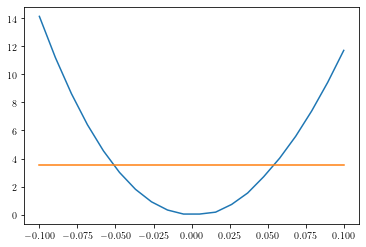

In [31]:
plt.plot(np.linspace(-0.10, 0.10, 20), delta_C)
plt.plot([-0.1, 0.1], [dchi,dchi])

**Error in C:** $\pm 0.05$ 

In [34]:
delta_bl = []
for err in np.linspace(-0.1, 0.1, 20):
    delta_bl.append(fit(np.array(bf) - np.array([0,err,0]))-L)

[<matplotlib.lines.Line2D at 0x7f2c021834c0>]

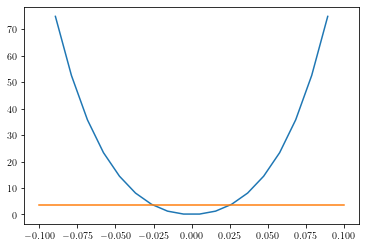

In [36]:
plt.plot(np.linspace(-0.1, 0.1, 20), delta_bl)
plt.plot([-0.1, 0.1], [dchi, dchi])

**Error in $\beta^\ell$:** $\pm 0.025$

In [41]:
delta_bq = []
for err in np.linspace(-2.0, 2.0, 20):
    delta_bq.append(fit(np.array(bf) + np.array([0,0,err]))-L)

(-1.0, 2.0)

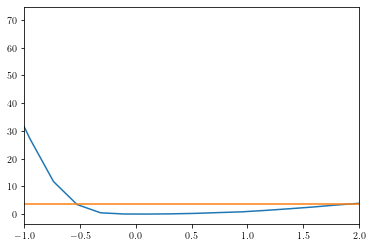

In [43]:
plt.plot(np.linspace(-2, 2, 20), delta_bq)
plt.plot([-2, 2], [dchi, dchi])
plt.xlim([-1,2])

**Error in $\beta^q$:** ${}^{+2.0}_{-0.5}$

## Scenario II
Fit to all parameters

In [7]:
def fit2(x):
    return -SMEFT19.likelihood_global(x, SMEFT19.scenarios.rotBII)

In [8]:
bf2, v2, d2, L2 = SMEFT19.ellipse.minimum(fit2, [-0.12, 0.07, 0, -0.076, 0.803])

Minimizing...
Pull: 6.573827298782075 sigma


In [10]:
bf2

array([-1.34958386e-01,  6.97193846e-02,  1.15553399e-08, -5.18055430e-02,
        7.29542188e-01])

In [11]:
-2*L2

57.06479239267408

In [9]:
SMEFT19.ellipse.save(bf2, v2, d2, L2, '../../ellipses/rotBII.yaml', name='Mass Rotation fit, Scenario II',
                     fit='rotBII')

### Confidence intervals scenario II

In [46]:
dchi = SMEFT19.SMEFTglob.smelli.flavio.statistics.functions.delta_chi2(1,5)
dchi

5.887595445915204

In [48]:
delta_C = []
for err in np.linspace(-0.10, 0.10, 20):
    delta_C.append(fit2(np.array(bf2) + np.array([err,0,0,0,0]))-L)

[<matplotlib.lines.Line2D at 0x7f2c0224e640>]

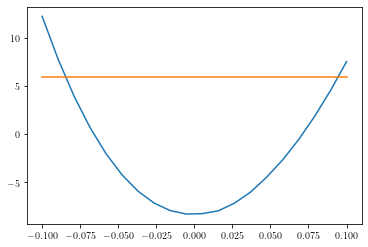

In [49]:
plt.plot(np.linspace(-0.10, 0.10, 20), delta_C)
plt.plot([-0.1, 0.1], [dchi, dchi])

**Error in C:** $\pm 0.08$

In [50]:
delta_al = []
for err in np.linspace(-0.07, 0.07, 20):
    delta_al.append(fit2(np.array(bf2) + np.array([0,err,0,0,0]))-L)

[<matplotlib.lines.Line2D at 0x7f2c01ca5a60>]

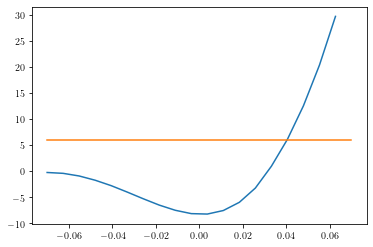

In [53]:
plt.plot(np.linspace(-0.07, 0.07, 20), delta_al)
plt.plot([-0.07, 0.07], [dchi, dchi])

**Error in $\alpha^\ell$:** ${}_{-0.07}^{+0.04}$

In [60]:
delta_bl = []
for err in np.linspace(-0.06, 0.06, 20):
    delta_bl.append(fit2(np.array(bf2) - np.array([0,0,err,0,0]))-L)

(-10.0, 80.0)

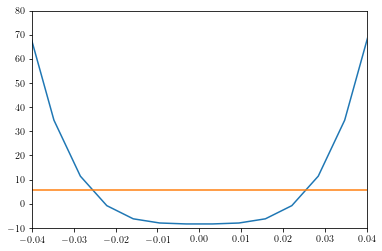

In [63]:
plt.plot(np.linspace(-0.06, 0.06, 20), delta_bl)
plt.plot([-0.06, 0.06], [dchi, dchi])
plt.xlim([-0.04, 0.04])
plt.ylim([-10, 80])

**Error in $\beta^\ell$:** $\pm0.025$

In [66]:
delta_aq = []
for err in np.linspace(-0.15, 0.07, 20):
    delta_aq.append(fit2(np.array(bf2) - np.array([0,0,0,err,0]))-L)

(-0.12, 0.07)

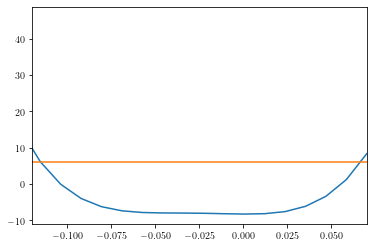

In [68]:
plt.plot(np.linspace(-0.15, 0.07, 20), delta_aq)
plt.plot([-0.15, 0.07], [dchi, dchi])
plt.xlim([-0.12, 0.07])

**Error in $\alpha^q$:** ${}_{-0.07}^{+0.12}$

In [79]:
delta_bq = []
for err in np.linspace(-0.7, 2.8, 20):
    delta_bq.append(fit2(np.array(bf2) + np.array([0,0,0,0,err]))-L)

[<matplotlib.lines.Line2D at 0x7f2c01a83f70>]

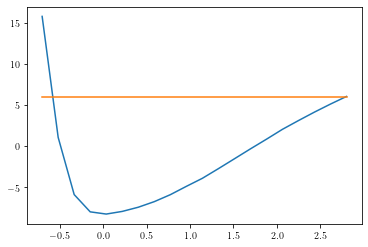

In [80]:
plt.plot(np.linspace(-0.7, 2.8, 20), delta_bq)
plt.plot([-0.7,2.8], [dchi, dchi])

**Error in $\beta^q$:** ${}^{+2.8}_{-0.6}$

## Observable Pulls

In [ ]:
SMEFT19.comparepulls.compare(SMEFT19.scenarios.rotBII, '../../ellipses/rotBII.yaml', '../../TeX/pullsBII')

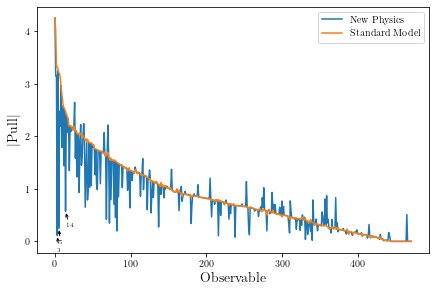

In [2]:
SMEFT19.plots.compare_plot(SMEFT19.scenarios.rotBII, '../../ellipses/rotBII.yaml', '../../plots/rotBII', 1.5)